In [1]:
import os, pickle
import pandas as pd
import seaborn as sns
import matplotlib
sns.set_theme(style="whitegrid")


In [2]:
old_files = []

In [3]:
def load_benchmark_data(base_dir = 'key_averages'):
    files = os.listdir(base_dir)
    name, weights, grads, opt, act, fn, compiled = field(default_factory=list),field(default_factory=list),[],[],[],[], []
    cput, gput, cpum, gpum = [],[],[],[]
    for file in files:
        name.append(file.removesuffix('.pkl'))
        desc = file.removesuffix('.pkl').split('-')
        if 'compiled' in file:
            compiled.append(True)
            stash_fn = desc[-2]
            tensors_tracker = desc[:-2]
        else:
            compiled.append(False)
            stash_fn = desc[-1]
            tensors_tracker = desc[:-1]

        fn.append(stash_fn)
        weights.append(True) if 'weights' in tensors_tracker else weights.append(False)
        grads.append(True) if 'gradients' in tensors_tracker else grads.append(False)
        opt.append(True) if 'opt_state' in tensors_tracker else opt.append(False)
        act.append(True) if 'activations' in tensors_tracker else act.append(False)

        with open(base_dir + '/' + file, 'rb') as f:
            ka = pickle.load(f)

        cpu_time, device_time, cpu_mem, device_mem = ka.total_average().self_cpu_time_total,ka.total_average().self_device_time_total,ka.total_average().device_memory_usage,ka.total_average().cpu_memory_usage

        cput.append(cpu_time)
        gput.append(device_time)
        cpum.append(cpu_mem)
        gpum.append(device_mem)

    return pd.DataFrame({
        'config_name' : name,
        'weights_tracked' : weights,
        'grad_tracked' : grads,
        'opt_state_tracker' : opt,
        'activations_tracked' : act,
        'cpu_time' : cput,
        'gpu_time' : gput,
        'cpu_mem' : cpum,
        'gpu_mem' : gpum,
        'fn' : fn,
        'compiled': compiled})
    
df = load_benchmark_data()
df.config_name = df.config_name.apply(lambda x: x.removesuffix('-compiled'))
df['relative_gpu_time'] = df.gpu_time / df.gpu_time.min()


Text(0.5, 0.98, 'STASH_ALL_STATS_AND_HIST')

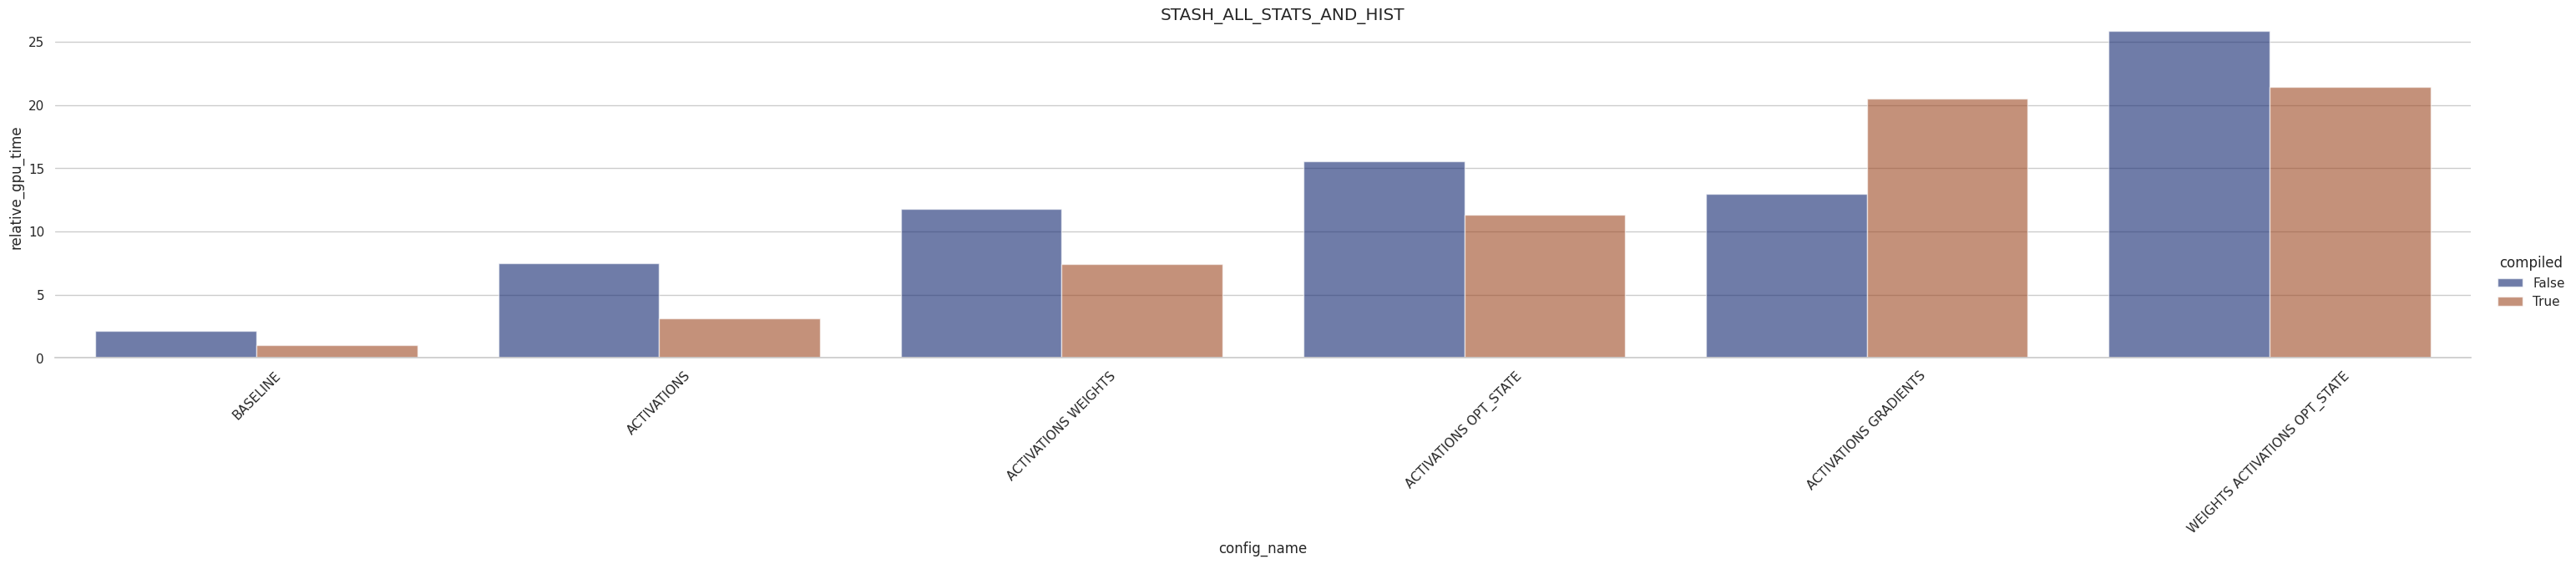

In [4]:
stashfn = 'stash_all_stats_and_hist'
sub_df = df.copy()
sub_df.config_name = sub_df.config_name.apply(lambda x: " ".join(x.removesuffix(f'-{stashfn}').split('-')).upper())

g = sns.catplot(kind='bar', data=sub_df[sub_df.fn.isin([stashfn,'baseline'])].sort_values('relative_gpu_time',ascending=True), x='config_name', y='relative_gpu_time',palette="dark", hue='compiled', alpha=.6, height=5,aspect=6)
g.despine(left=True)
g.ax.xaxis.set_tick_params(rotation=45)
g.figure.suptitle(stashfn.upper())


Text(0.5, 0.98, 'STASH_HIST')

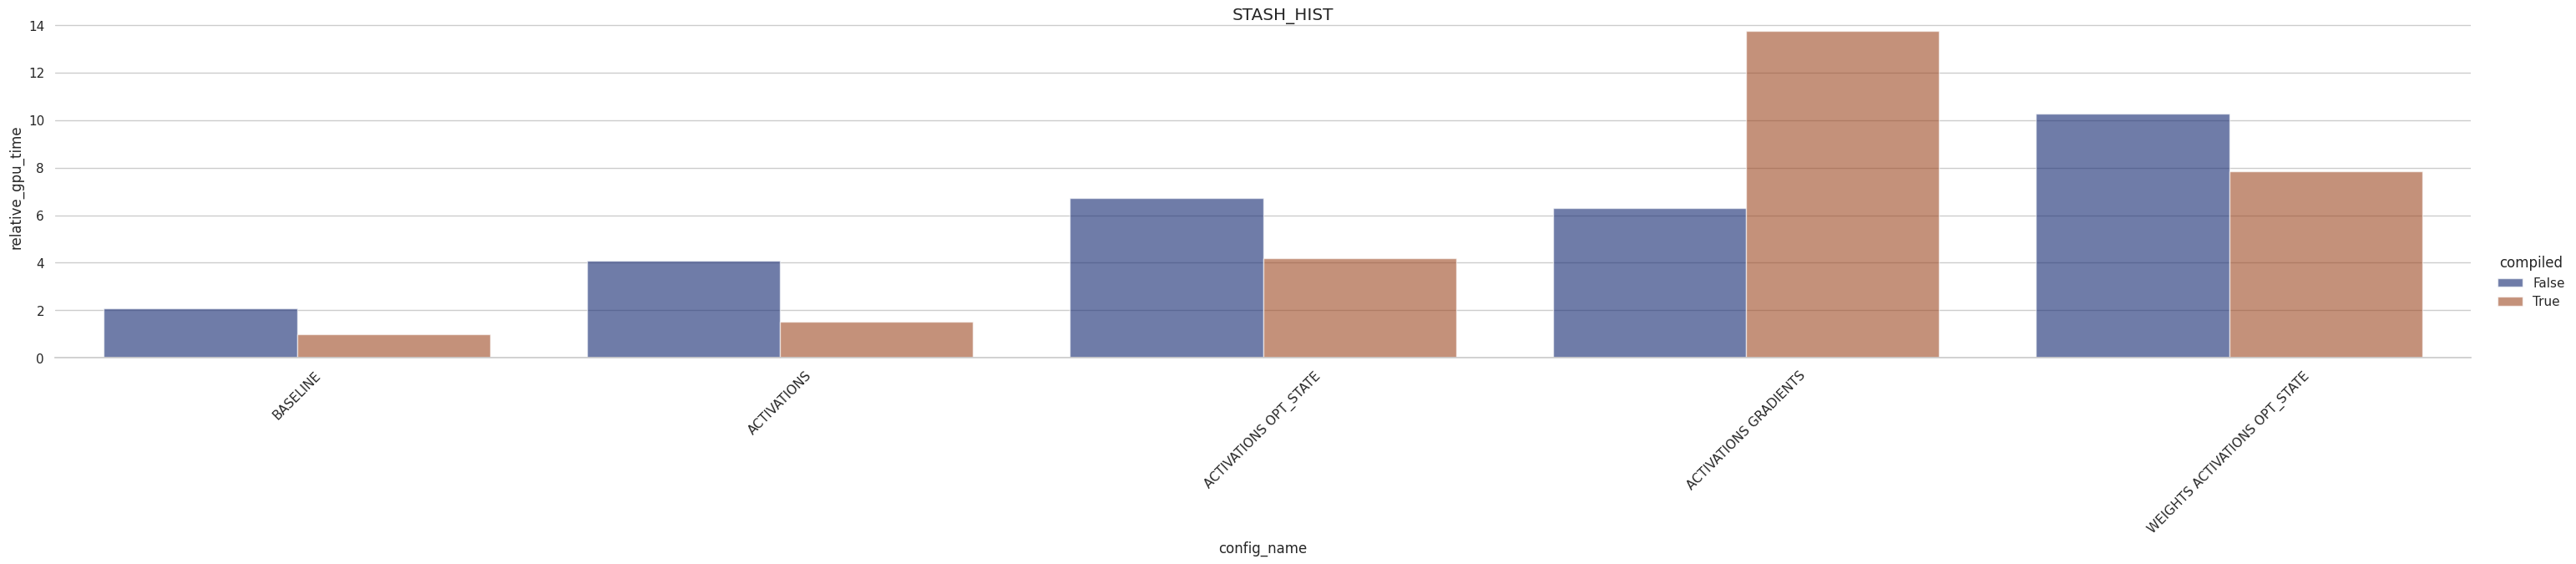

In [5]:
stashfn = 'stash_hist'
sub_df = df.copy()
sub_df.config_name = sub_df.config_name.apply(lambda x: " ".join(x.removesuffix(f'-{stashfn}').split('-')).upper())

g = sns.catplot(kind='bar', data=sub_df[sub_df.fn.isin([stashfn,'baseline'])].sort_values('relative_gpu_time',ascending=True), x='config_name', y='relative_gpu_time',palette="dark", hue='compiled', alpha=.6, height=5,aspect=6)
g.despine(left=True)
g.ax.xaxis.set_tick_params(rotation=45)
g.figure.suptitle(stashfn.upper())


Text(0.5, 0.98, 'STASH_SCALAR_STATS')

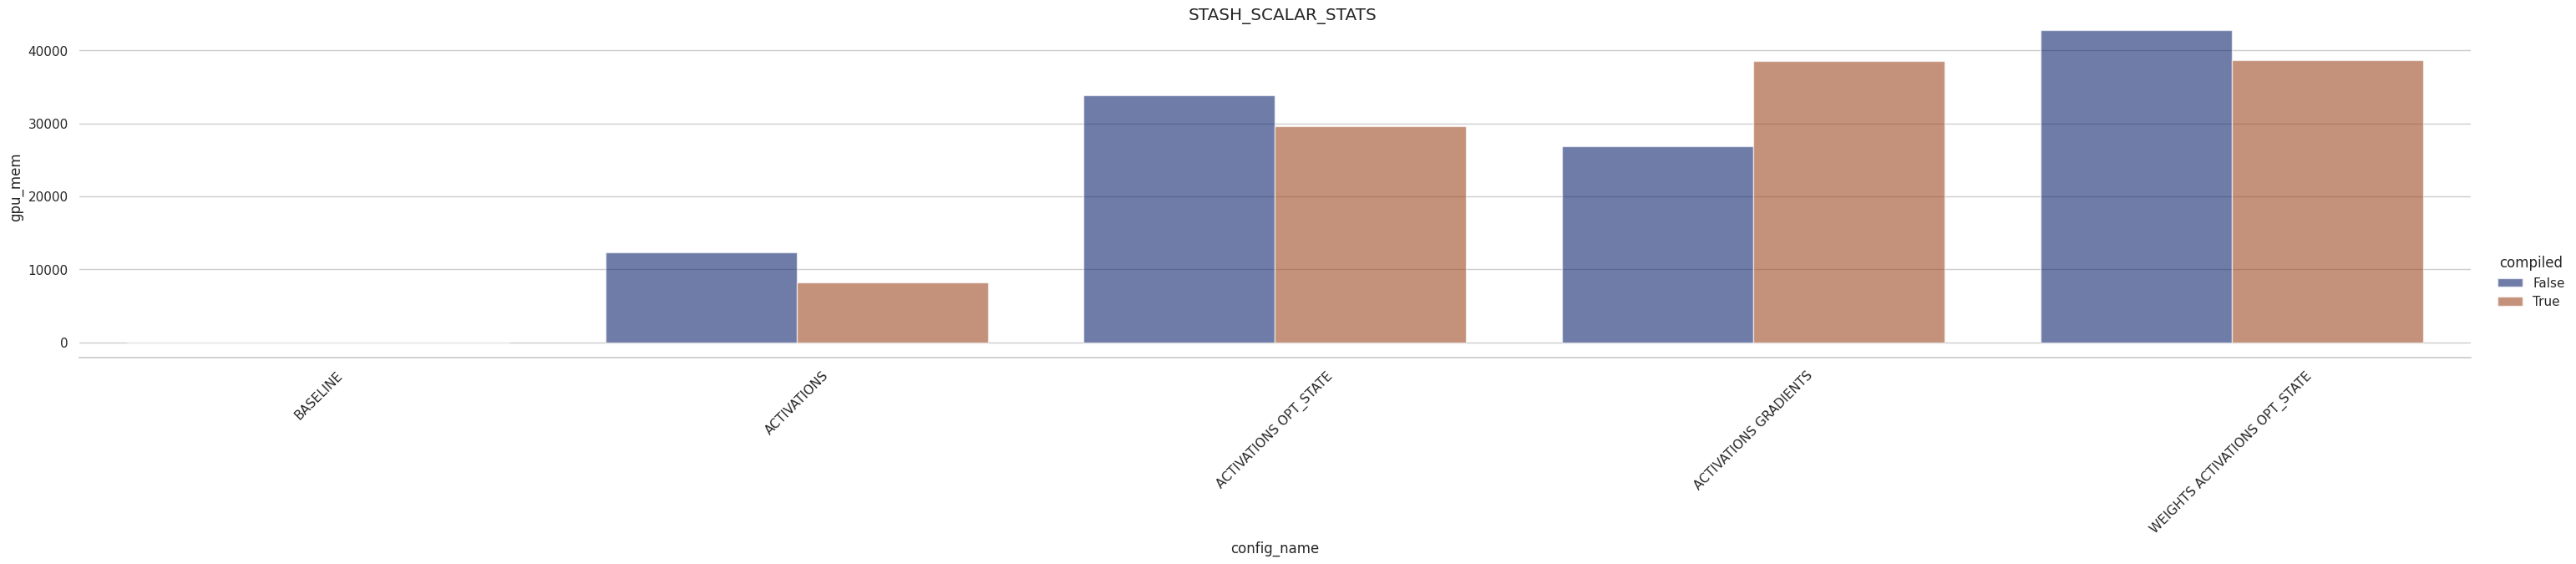

In [6]:
stashfn = 'stash_scalar_stats'
sub_df = df.copy()
sub_df.config_name = sub_df.config_name.apply(lambda x: " ".join(x.removesuffix(f'-{stashfn}').split('-')).upper())

g = sns.catplot(kind='bar', data=sub_df[sub_df.fn.isin([stashfn,'baseline'])].sort_values('relative_gpu_time',ascending=True), x='config_name', y='gpu_mem',palette="dark", hue='compiled', alpha=.6, height=5,aspect=6)
g.despine(left=True)
g.ax.xaxis.set_tick_params(rotation=45)
g.figure.suptitle(stashfn.upper())

Text(0.5, 0.98, 'DEFAULT_STASH_VALUE')

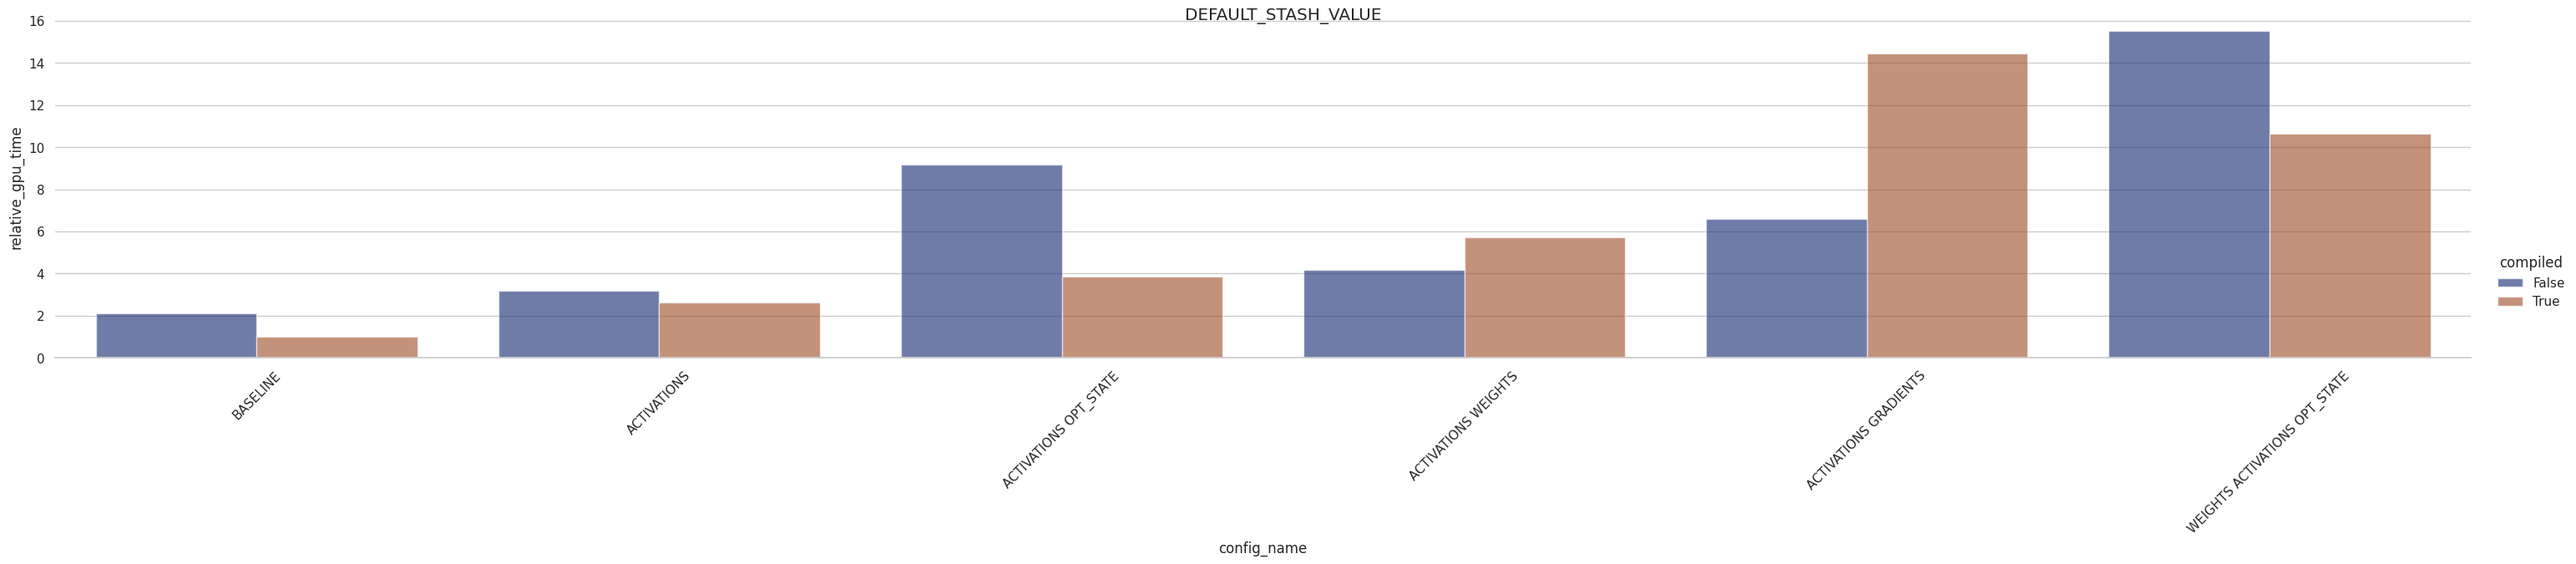

In [7]:
stashfn = 'stash_full_tensor'
sub_df = df.copy()
sub_df.config_name = sub_df.config_name.apply(lambda x: " ".join(x.removesuffix(f'-{stashfn}').split('-')).upper())

g = sns.catplot(kind='bar', data=sub_df[sub_df.fn.isin([stashfn,'baseline'])].sort_values('relative_gpu_time',ascending=True), x='config_name', y='relative_gpu_time',palette="dark", hue='compiled', alpha=.6, height=5,aspect=6)
g.despine(left=True)
g.axes[-1][0].xaxis.set_tick_params(rotation=45)
g.figure.suptitle(stashfn.upper())

In [2]:
import pickle
import pandas as pd

In [114]:
# '../simple-benchmark/results.pkl'
# /home/ubuntu/numerics-vis/profiling-logging-overhead/numerics-llama.c/compile_opt-results.pkl
# profiling-logging-overhead/numerics-llama.c/compile_opt-static_lr_and_no_weightdecay-results.pkl
with open('/home/ubuntu/numerics-vis/profiling-logging-overhead/numerics-llama.c/results.pkl', 'rb') as f:
    data = pickle.load(f)

from dataclasses import dataclass,field
from typing import List

@dataclass
class Results:
    compiled: List[bool] = field(default_factory=list)
    batch_size: List[int] = field(default_factory=list)
    input_size: List[int] = field(default_factory=list)
    activations: List[bool] = field(default_factory=list)
    weights: List[bool] = field(default_factory=list)
    gradients: List[bool] = field(default_factory=list)
    opt_state: List[bool] = field(default_factory=list)
    stashfn: List[str] = field(default_factory=list)
    average_time_per_it: List[float] = field(default_factory=list)
    conf: List[str] = field(default_factory=list)

res = Results()


res = Results()
tt_types = ['weights','activations','gradients','opt_state']
for k, v in data.items():
    if 'compiled' in k:
        res.average_time_per_it.append(v)
        res.compiled.append(True)
        # remove the fina on...
        config = k.split('-')[:-1]
        res.stashfn.append(config.pop(-1))
        res.batch_size.append(1)
        res.input_size.append(None)
        for tensor in tt_types:
            if tensor in config:
                getattr(res,tensor).append(True)
            else:
                getattr(res,tensor).append(False)
        res.conf.append(' '.join(config))

        

    else:
        res.average_time_per_it.append(v)
        res.compiled.append(False)
        config = k.split('-')
        res.stashfn.append(config.pop(-1))
        res.batch_size.append(1)
        res.input_size.append(None)
        for tensor in tt_types:
            if tensor in config:
                getattr(res,tensor).append(True)
            else:
                getattr(res,tensor).append(False)
        res.conf.append(' '.join(config))

df = pd.DataFrame(res.__dict__)

In [108]:
import seaborn as sns

In [109]:
df.head()

,compiled,batch_size,input_size,activations,weights,gradients,opt_state,stashfn,average_time_per_it,conf
0,True,1,None,False,False,False,False,baseline,10.731523,
1,False,1,None,False,False,False,False,baseline,21.714432,
2,True,1,None,True,False,False,False,stash_full_tensor,41.535488,activations
3,True,1,None,True,False,False,True,stash_full_tensor,75.691427,activations opt_state
4,True,1,None,True,True,False,True,stash_full_tensor,103.229324,weights activations opt_state


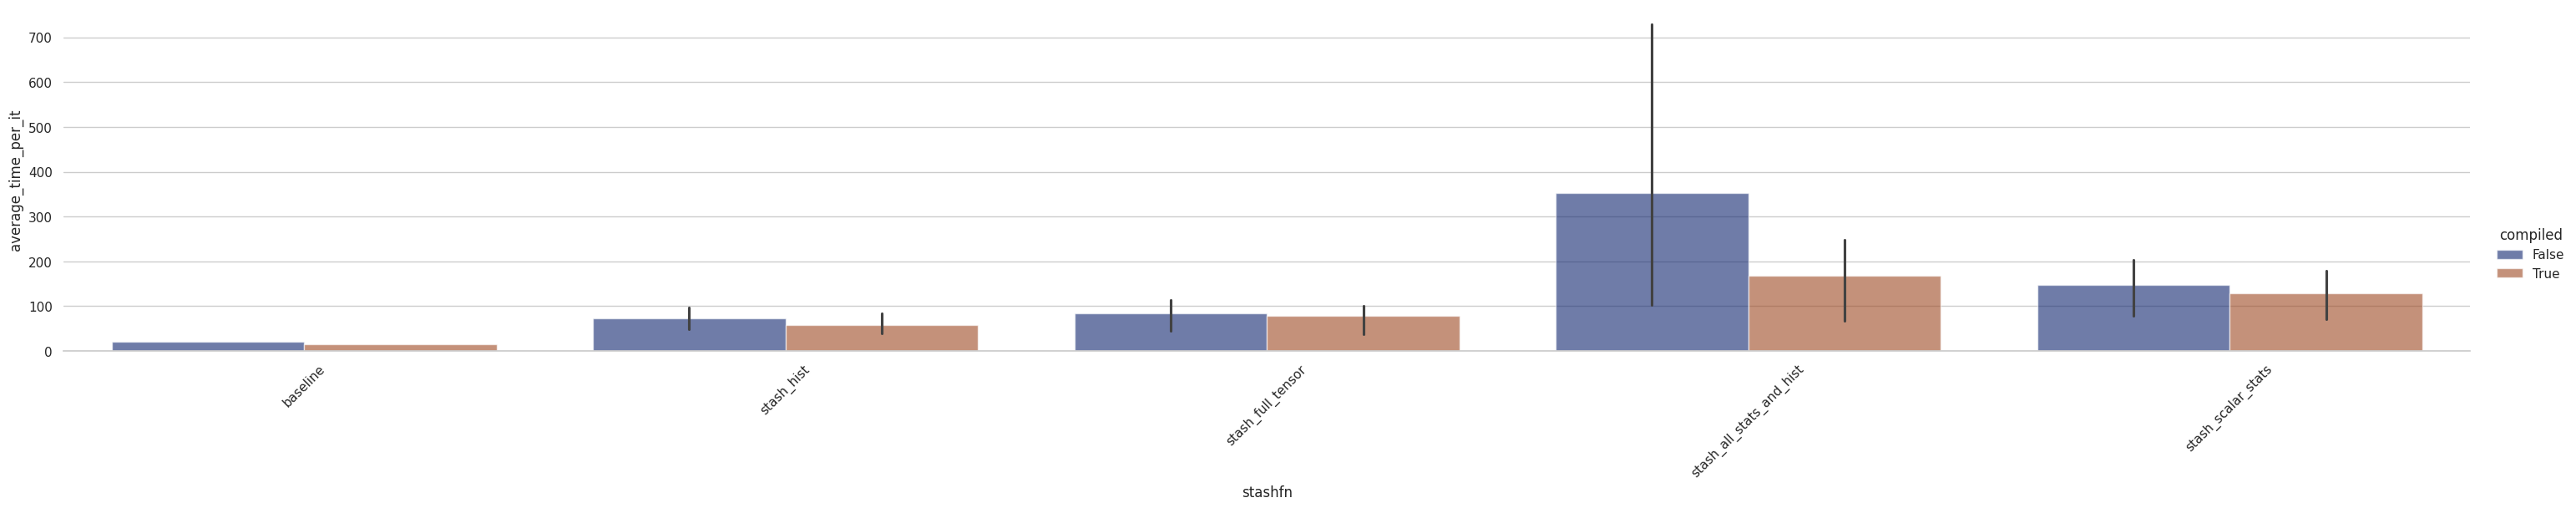

In [101]:
g = sns.catplot(kind='bar', data=df.sort_values('average_time_per_it',ascending=True), x='stashfn', y='average_time_per_it',palette="dark", hue='compiled', alpha=.6, height=5,aspect=6)
g.despine(left=True)
g.axes[-1][0].xaxis.set_tick_params(rotation=45)
# g.figure.suptitle(stashfn.upper())

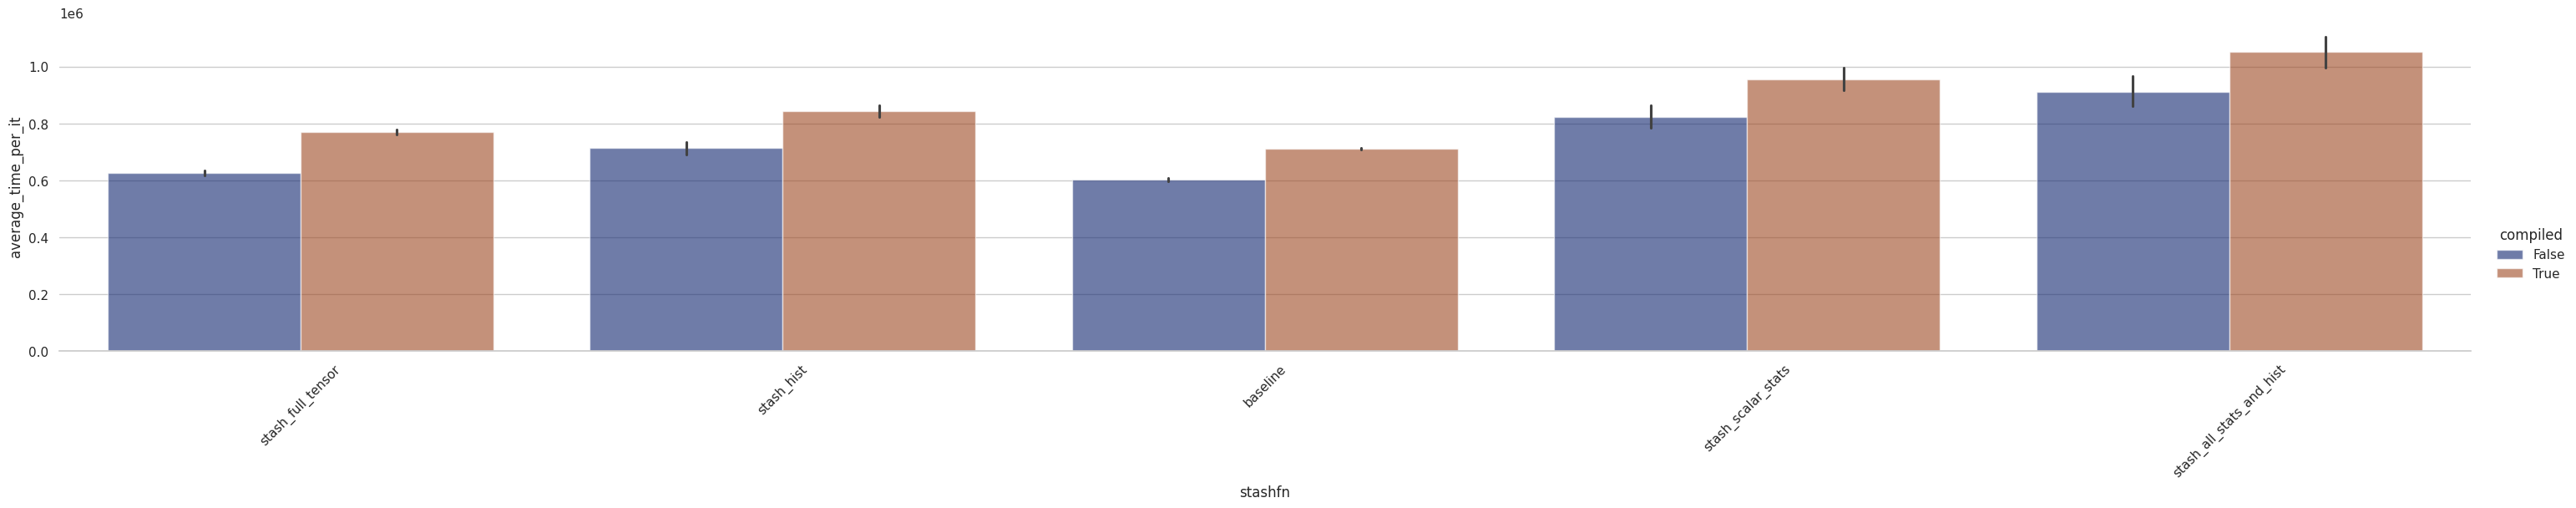

In [36]:
g = sns.catplot(kind='bar', data=df[df.gradients == False].sort_values('average_time_per_it',ascending=True), x='stashfn', y='average_time_per_it',palette="dark", hue='compiled', alpha=.6, height=5,aspect=6)
g.despine(left=True)
g.axes[-1][0].xaxis.set_tick_params(rotation=45)

In [103]:
df.head()

,compiled,batch_size,input_size,activations,weights,gradients,opt_state,stashfn,average_time_per_it,conf
0,True,1,None,False,False,False,False,baseline,14.820045,
1,False,1,None,False,False,False,False,baseline,20.315539,
2,True,1,None,True,False,False,False,stash_full_tensor,38.134470,activations
3,True,1,None,True,False,False,True,stash_full_tensor,95.861555,activations opt_state
4,True,1,None,True,True,False,True,stash_full_tensor,100.828385,weights activations opt_state


In [104]:
df['rel_time_per_it'] = df.average_time_per_it / 20.315539

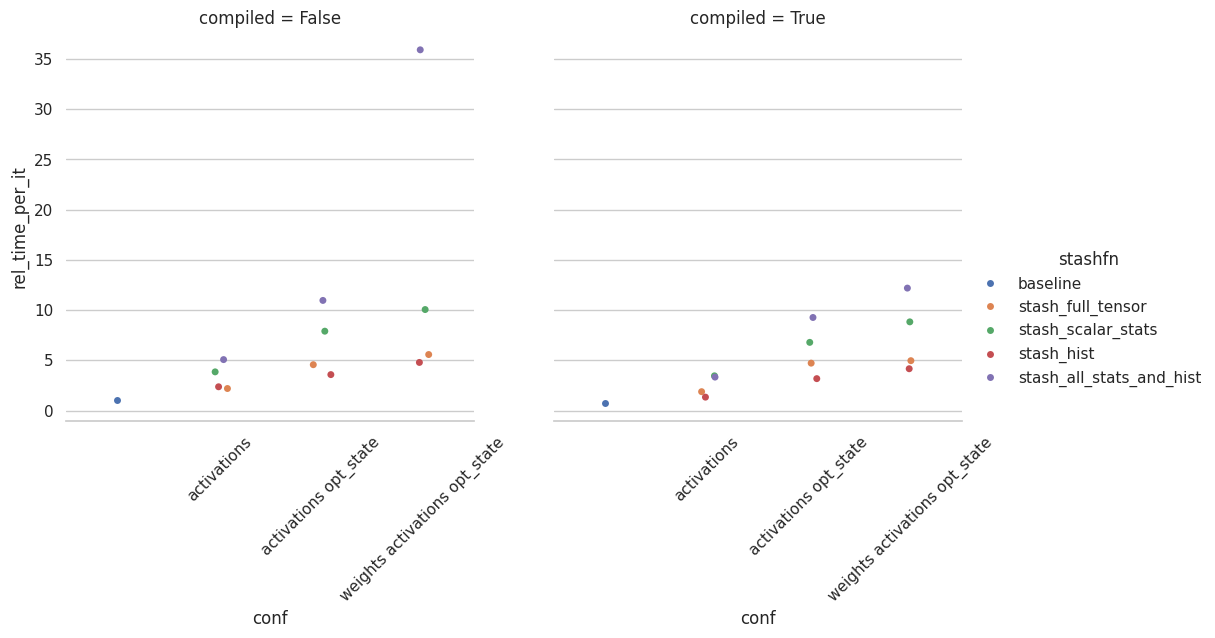

In [105]:
g = sns.catplot(df, x='conf',y='rel_time_per_it', hue='stashfn', col='compiled')
g.despine(left=True)

g.tick_params('x',rotation=45)

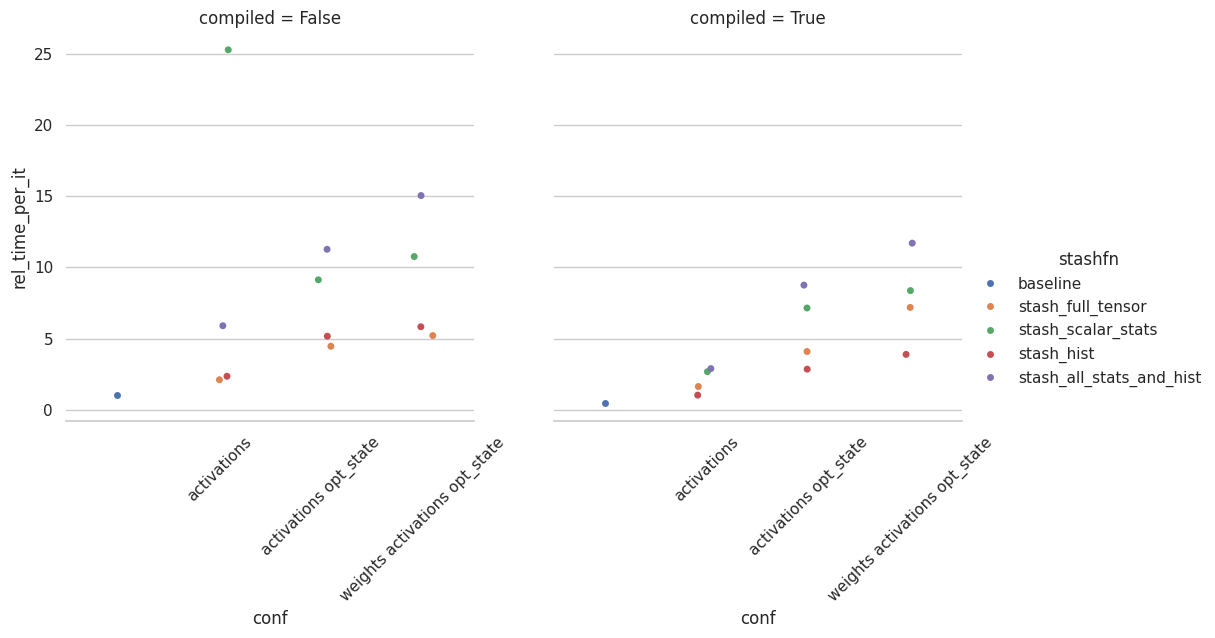

In [116]:
# df.head()
df['rel_time_per_it'] = df.average_time_per_it / 21.496627
g = sns.catplot(df, x='conf',y='rel_time_per_it', hue='stashfn', col='compiled')
g.despine(left=True)

g.tick_params('x',rotation=45)

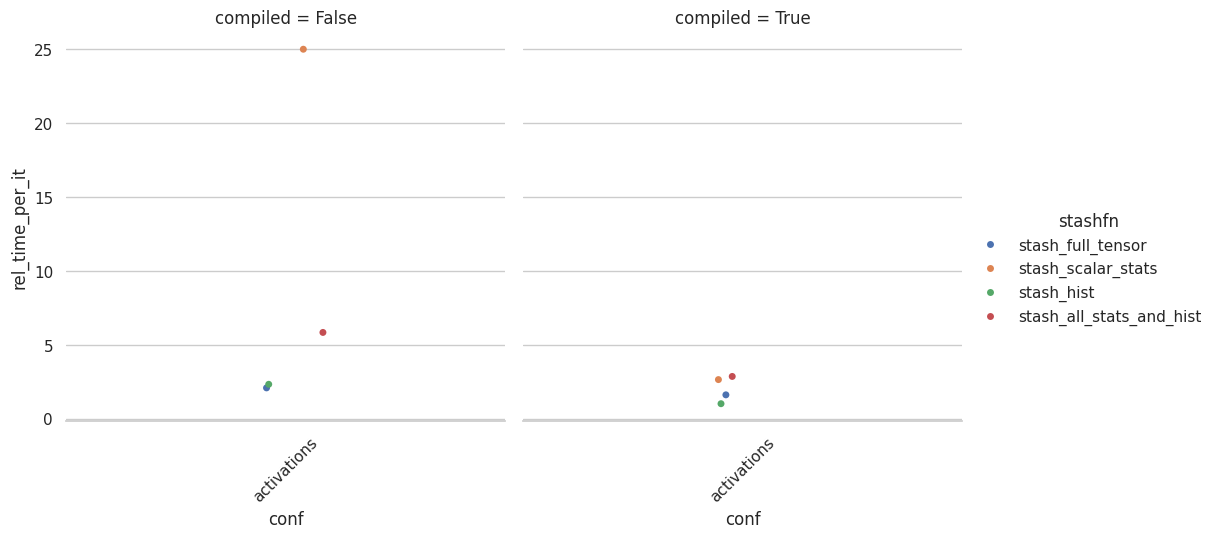

In [121]:
df['rel_time_per_it'] = df.average_time_per_it / 21.714432
g = sns.catplot(df[df.conf.isin(['activations','weights activations'])], x='conf',y='rel_time_per_it', hue='stashfn', col='compiled')
g.despine(left=True)

g.tick_params('x',rotation=45)